In [1]:
import cv2

In [10]:
import matplotlib.pyplot as plt
import os
print(os.getcwd())
os.listdir(os.getcwd())

/home/ec2-user/SageMaker


['Untitled.ipynb', 'lost+found', 'Pics', '.sparkmagic', '.ipynb_checkpoints']

In [18]:
!aws s3 sync s3://sagemaker-studio-XXX-mz9wugir6l/Testing-trump.jpg /home/ec2-user/SageMaker/Pics/

In [20]:
# print(os.path.join(path, "User/Desktop", "file.txt")) 
print(os.listdir("/home/ec2-user/SageMaker/Pics"))

['Testing-trump1.jpg']


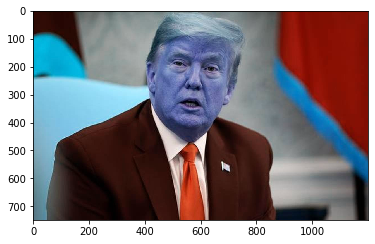

In [22]:
plt.imshow(cv2.imread("Pics/Testing-trump1.jpg"))
plt.show()

In [1]:
# !pip install keras
# !pip install tensorflow
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K
from keras.models import load_model
K.set_image_data_format('channels_first')

import pickle
import cv2
import os.path
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
from utility import *
from webcam_utility import *

# Libs Installed

In [2]:
# triplet loss function
#  y_pred - list containing three objects:
#         anchor(None, 128) -- encodings for the anchor images
#         positive(None, 128) -- encodings for the positive images
#         negative(None, 128) -- encodings for the negative images
def triplet_loss(y_true, y_pred, alpha = 0.2):
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    print("This is a custom loss function")
    print("y_list:",y_pred)
    
    # triplet formula components
    pos_dist = tf.reduce_sum( tf.square(tf.subtract(y_pred[0], y_pred[1])) )
    neg_dist = tf.reduce_sum( tf.square(tf.subtract(y_pred[0], y_pred[2])) )
    basic_loss = pos_dist - neg_dist + alpha
    
    loss = tf.maximum(basic_loss, 0.0)
   
    return loss

In [3]:
# load the model
FRmodel = load_model('models/facenet_keras.h5', custom_objects={'triplet_loss': triplet_loss})
# FRmodel = load_model('models/facenet_keras.h5', compile=False)
FRmodel.compile(loss=triplet_loss)

In [4]:
# initialize the user database
def ini_user_database():
    # check for existing database
    if os.path.exists('database/user_dict.pickle'):
        with open('database/user_dict.pickle', 'rb') as handle:
            user_db = pickle.load(handle)   
    else:
        # make a new one
        # we use a dict for keeping track of mapping of each person with his/her face encoding
        user_db = {}
        # create the directory for saving the db pickle file
        os.makedirs('database')
        with open('database/user_dict.pickle', 'wb') as handle:
            pickle.dump(user_db, handle, protocol=pickle.HIGHEST_PROTOCOL)   
    return user_db

In [5]:
# adds a new user face to the database using his/her image stored on disk using the image path
def add_user_img_path(user_db, FRmodel, name, img_path):
    if name not in user_db: 
        user_db[name] = img_to_encoding(img_path, FRmodel)
        print("Encodings:",user_db[name])
        # save the database
        with open('database/user_dict.pickle', 'wb') as handle:
                pickle.dump(user_db, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print('User ' + name + ' added successfully')
    else:
        print('The name is already registered! Try a different name.........')

In [6]:
# adds a new user using image taken from webcam
def add_user_webcam(user_db, FRmodel, name):
    # we can use the webcam to capture the user image then get it recognized
    face_found = detect_face(user_db, FRmodel)

    if face_found:
        img_loc="saved_image/UserGenerated.jpg"
        resize_img(img_loc,(96,96))
        
        if name not in user_db: 
            add_user_img_path(user_db, FRmodel, name, "saved_image/UserGenerated.jpg")
        else:
            print('The name is already registered! Try a different name.........')
    else:
        print('There was no face found in the visible frame. Try again...........')

In [7]:
# deletes a registered user from database
def delete_user(user_db, name):
    popped = user_db.pop(name, None)
    
    if popped is not None:
        print('User ' + name + ' deleted successfully')
        # save the database
        with open('database/user_dict.pickle', 'wb') as handle:
                pickle.dump(user_db, handle, protocol=pickle.HIGHEST_PROTOCOL)
    elif popped == None:
        print('No such user !!')

In [8]:
# we use a dict for keeping track of mapping of each person with his/her face encoding
user_db = ini_user_database()

In [10]:
# add a user
add_user_img_path(user_db, FRmodel, "chris", "images/Chris.jpg")

original: (1200, 1199, 3)
Encodings: [[ 0.21243575  1.4870605   0.34620684 -0.21364415  0.7994552   1.8348689
   1.4733641  -1.94687    -1.4214312  -2.4742494   0.20417497 -2.602315
  -1.162993    0.77501905 -0.7655523  -0.6019009   0.9742656  -2.2950404
   0.7086493  -1.7514963   0.73423886 -2.8279603   0.744513    1.2622596
   1.6189156   2.994351    2.2135727   1.0248547  -1.4661311  -2.6489449
  -0.13461933  3.1561704  -1.2626374   1.6896883  -0.19222228  0.256821
   2.168376   -1.6440305   2.2708561   1.7580506   0.71189857 -0.66426796
  -0.52619946 -0.49733785 -1.1122203   1.4877937   0.7859377   0.91837
   0.7907578  -1.9750553   0.8712      1.1249143   1.5289713   0.9966651
   0.6495881   4.911961    1.1818693  -2.3678343   2.3550577   1.5036898
  -1.1371188  -0.6157577   1.6853583   1.1468865  -1.2868985  -0.6463041
   1.7542212  -0.8161696   1.568475    0.6682366  -0.31580374  1.3663466
   0.204104    1.9195625  -2.507215    1.6343113  -0.419337    0.98621505
  -1.9098802  -2

In [13]:
# add_user_webcam(user_db, FRmodel, "Abhishek")

In [23]:
delete_user(user_db, "Abhishek")

User Abhishek deleted successfully


In [11]:
# recognize the input user face encoding by checking for it in the database
def find_face(image_path, database, model, threshold = 0.6):
    # find the face encodings for the input image
    encoding = img_to_encoding(image_path, model)
    
    min_dist = 99999
    # loop over all the recorded encodings in database 
    for name in database:
        # find the similarity between the input encodings and claimed person's encodings using L2 norm
        dist = np.linalg.norm(np.subtract(database[name], encoding) )
        # check if minimum distance or not
        if dist < min_dist:
            min_dist = dist
            identity = name

    if min_dist > threshold:
        print("User not in the database.")
        identity = 'Unknown Person'
    else:
        print ("Hi! " + str(identity) + ", L2 distance: " + str(min_dist))
        
    return min_dist, identity

In [12]:
# takes an input image from webcam and performs face recognition on it
def do_face_recognition_webcam(user_db, FRmodel, threshold = 0.7):
    # we can use the webcam to capture the user image then get it recognized
    face_found = detect_face(user_db, FRmodel)

    if face_found:
        # img_loc= location where the temporary webcam images are saved
        # resize the image for the model
        img_loc="saved_image/UserGenerated.jpg"
        resize_img(img_loc,(96,96))
        find_face(img_loc, user_db, FRmodel, threshold)
    else:
        print('There was no face found in the visible frame. Try again...........')

In [13]:
# takes an input image and performs face recognition on it
def do_face_recognition_from_image(user_db, FRmodel, threshold = 0.7, img_loc = "saved_image/UserGenerated.jpg"):
    # resize the image
    img = cv2.imread(img_loc, 1)
    img = cv2.resize(img, (96, 96))
    # save the temporary image
    cv2.imwrite("saved_image/UserGenerated.jpg", img)

    find_face("saved_image/UserGenerated.jpg", user_db, FRmodel, threshold)

In [ ]:
# Using webcam
# do_face_recognition_webcam(user_db, FRmodel, 0.6)

In [17]:
add_user_img_path(user_db, FRmodel, "david", "images/David.jpg")
add_user_img_path(user_db, FRmodel, "trump", "images/Trump.jpg")

original: (2015, 1546, 3)
Encodings: [[ 0.2662596   1.6265639   0.679858   -0.25694746  0.6111113   1.3850282
   1.4270083  -1.6256689  -0.7207661  -2.1980608   0.92455435 -2.16233
  -0.78139997  0.84164274 -1.2204086  -0.9502414   1.1284724  -2.3506
   0.7020327  -0.950412    0.5338739  -2.6205077   0.8008087   1.2891016
   1.3358883   2.507016    2.8186731   0.97872263 -1.000488   -2.6559255
  -0.20686713  2.674616   -1.0192821   1.1322008  -0.63317657  0.7582433
   2.320099   -1.7940814   1.9411137   1.1183635  -0.22318849 -0.7842216
  -0.5781913  -0.4973529  -2.0327818   1.9662676   0.7227021  -0.49976805
  -0.22121012 -1.728642    1.0046715   0.889036    1.3733484   1.5546688
   0.02442622  4.829969   -0.23765256 -2.5934105   1.9566071   1.462807
  -1.0523882   0.31321555  1.8441315   0.2875822  -0.8322992   0.16632673
   1.2991756  -0.07659063  1.7845378   1.3034441  -0.11877072  1.2024535
   0.56076175  0.9919031  -1.9835743   2.6179082  -0.01604286  0.40949655
  -1.2953849  -2.

In [18]:
# recognize the input user face encoding by checking for it in the database
def find_face(image_path, database, model, threshold = 0.6):
    # find the face encodings for the input image
    print(image_path)
    encoding = img_to_encoding(image_path, model)
    
    min_dist = 99999
    # loop over all the recorded encodings in database 
    for name in database:
        # find the similarity between the input encodings and claimed person's encodings using L2 norm
        dist = np.linalg.norm(np.subtract(database[name], encoding) )
        # check if minimum distance or not
        if dist < min_dist:
            min_dist = dist
            identity = name
    print("min_dist:",min_dist," and Identity:",identity)
    if min_dist < threshold: #condition reversed
        print("User not in the database.")
        identity = 'Unknown Person'
    else:
        print ("Hi! " + str(identity) + ", L2 distance: " + str(min_dist))
        
    return min_dist, identity

In [19]:
# takes an input image from webcam and performs face recognition on it
def do_face_recognition_webcam(user_db, FRmodel, threshold = 0.7):
    # we can use the webcam to capture the user image then get it recognized
    face_found = detect_face(user_db, FRmodel)

    if face_found:
        # "saved_image/1.jpg": location where the temporary webcam images are saved
        # resize the image for the model
        resize_img("saved_image/UserGenerated.jpg")
        find_face(img_loc, user_db, FRmodel, threshold)
    else:
        print('There was no face found in the visible frame. Try again...........')

In [20]:
# takes an input image and performs face recognition on it
def do_face_recognition_from_image(user_db, FRmodel, threshold = 0.7, img_loc = "saved_image/UserGenerated.jpg"):
    # resize the image
    img = cv2.imread(img_loc, 1)
    img = cv2.resize(img, (96, 96))
    # save the temporary image
    cv2.imwrite("saved_image/UserGenerated.jpg", img)

    find_face("saved_image/UserGenerated.jpg", user_db, FRmodel, threshold)

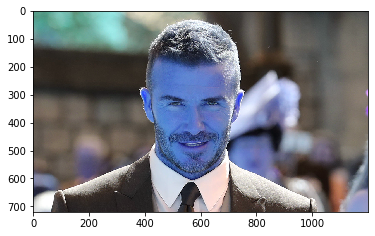

saved_image/UserGenerated.jpg
original: (96, 96, 3)
min_dist: 6.5260262  and Identity: david
Hi! david, L2 distance: 6.5260262


In [21]:
# using image on disk
import matplotlib.pyplot as plt
plt.imshow(cv2.imread("David-Test.jpg"))
plt.show()
do_face_recognition_from_image(user_db, FRmodel, threshold = 0.7, img_loc = "David-Test.jpg")

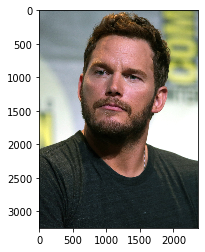

saved_image/UserGenerated.jpg
original: (96, 96, 3)
min_dist: 10.878369  and Identity: chris
Hi! chris, L2 distance: 10.878369


In [24]:
# using image on disk
plt.imshow(cv2.cvtColor(cv2.imread("Chris_Test.jpg"), cv2.COLOR_RGB2BGR))
plt.show()
do_face_recognition_from_image(user_db, FRmodel, threshold = 0.7, img_loc = "Chris_Test.jpg")

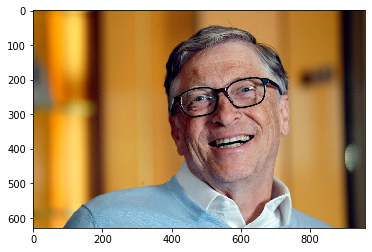

saved_image/UserGenerated.jpg
original: (96, 96, 3)
min_dist: 4.4945955  and Identity: david
Hi! david, L2 distance: 4.4945955


In [25]:
# using image on disk
plt.imshow(cv2.cvtColor(cv2.imread("Bill-Test.jpg"), cv2.COLOR_RGB2BGR))
plt.show()
do_face_recognition_from_image(user_db, FRmodel, threshold = 0.7, img_loc = "Bill-Test.jpg")

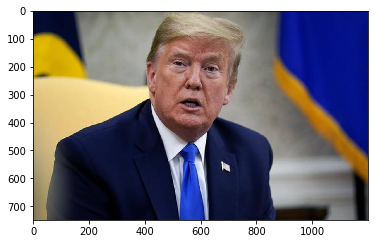

saved_image/UserGenerated.jpg
original: (96, 96, 3)
min_dist: 10.430049  and Identity: trump
Hi! trump, L2 distance: 10.430049


In [26]:
# using image on disk
plt.imshow(cv2.cvtColor(cv2.imread("Testing-trump1.jpg"), cv2.COLOR_RGB2BGR))
plt.show()
do_face_recognition_from_image(user_db, FRmodel, threshold = 0.7, img_loc = "Testing-trump1.jpg")

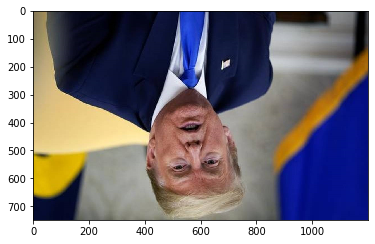

saved_image/UserGenerated.jpg
original: (96, 96, 3)
min_dist: 7.9695  and Identity: trump
Hi! trump, L2 distance: 7.9695


In [27]:
# using image on disk
plt.imshow(cv2.cvtColor(cv2.imread("Testing-trump1-Inverted.jpg"), cv2.COLOR_RGB2BGR))
plt.show()
do_face_recognition_from_image(user_db, FRmodel, threshold = 0.7, img_loc = "Testing-trump1-Inverted.jpg")

# Thank you